In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from glob import glob

# Helper Functions

In [385]:
def plot_data_event(df, fs, event_dict=None, event_id=None):
    time = np.arange(len(df["Data"])) / fs
    #visualise
    plt.figure(figsize=(12,4))
    # Labeling and legend
    plt.plot(time, df["Data"])
    if type(event_id) == int:
        event_time = df['Timestamp'].loc[df['Status'] == event_id]
        span = plt.axvspan(event_time.index[0]/fs, event_time.index[-1]/fs, color='red', alpha=0.5)
        plt.legend([span], [list(event_dict.keys())[event_id]], loc='upper right', bbox_to_anchor=(1.15, 1.02))

    if type(event_id) == str:
        event_time = df['Timestamp'].loc[df['Status'] == int(event_dict[event_id])]
        span = plt.axvspan(event_time.index[0]/fs, event_time.index[-1]/fs, color='red', alpha=0.5)
        plt.legend([span], [event_id], loc='upper right', bbox_to_anchor=(1.15, 1.02))

    plt.xlabel('Time(seconds)')
    plt.ylabel('Amplitude')
    if fs == 130:
        plt.title('Polar H10 ECG Data')
    elif fs == 64:
        plt.title('Empatica E4 PPG Data')
    else:
        plt.title('Galaxy Watch PPG Data')

    # Show plot
    plt.show()

In [386]:
def plot_data_whole_event(df, fs, event_dict):
    legend_handles = []
    legend_labels = []
    time = np.arange(len(df["Data"])) / fs
    #visualise
    plt.figure(figsize=(12,4))
    # Labeling and legend
    plt.plot(time, df["Data"])
    
    for i in range(len(event_dict)-1):
        event_time = df['Timestamp'].loc[df['Status'] == int(list(event_dict.values())[i+1])]
        color = plt.cm.tab20(i % 20)
        span = plt.axvspan(event_time.index[0]/fs, event_time.index[-1]/fs, color=color, alpha=0.5)
        legend_handles.append(span)
        legend_labels.append(list(event_dict.keys())[i+1])


    plt.xlabel('Time(seconds)')
    plt.ylabel('PPG Amplitude')
    if fs == 130:
        plt.title('Polar H10 ECG Data')
    elif fs == 64:
        plt.title('Empatica E4 PPG Data')
    else:
        plt.title('Galaxy Watch PPG Data')
    # Create legend with multiple entries
    plt.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1.02))

    # Show plot
    plt.show()

# Data Loading

In [378]:
DATA_PATH = "./Experiment/Raw/"
SUBJECT_PATH = "P04/"
POLAR_PATH = "PolarH10/"
E4_PATH = 'e4/'
GALAXY_PATH = 'GalaxyWatch/'

In [379]:
polarh10_sample_rate = 130
e4_sample_rate = 64
galaxy_sample_rate = 25

### Sensor data

In [380]:
polarh10_df = pd.read_csv(glob(os.path.join(DATA_PATH, SUBJECT_PATH, POLAR_PATH, "labeled_data.csv"))[0])
e4_df = pd.read_csv(glob(os.path.join(DATA_PATH, SUBJECT_PATH, E4_PATH, "labeled_data.csv"))[0])
galaxy_df = pd.read_csv(glob(os.path.join(DATA_PATH, SUBJECT_PATH, GALAXY_PATH, "labeled_data.csv"))[0])

### Event data

In [381]:
# Reload CSV file as dictionary
event_dict = {}
with open(DATA_PATH + SUBJECT_PATH+ "event_dict.csv", 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        event_dict = row

# Data Visualization 

### Plot with Event Marker - by Event ID

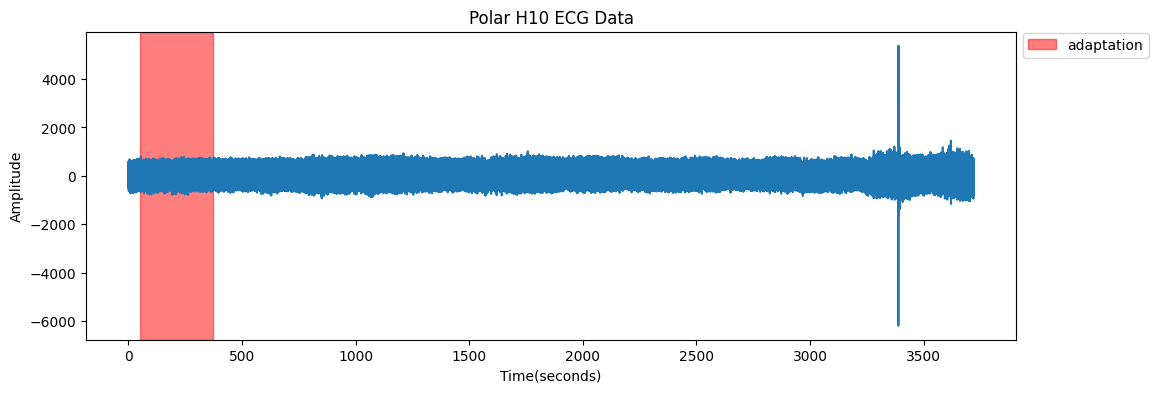

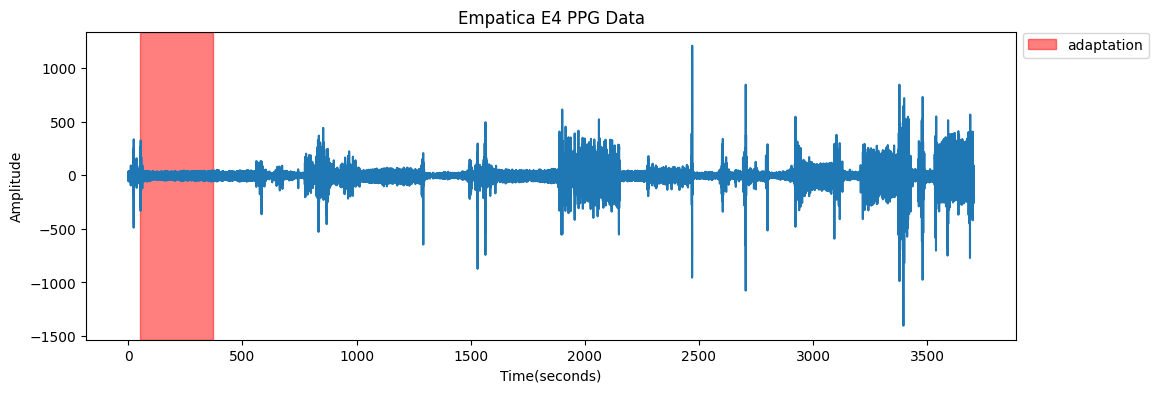

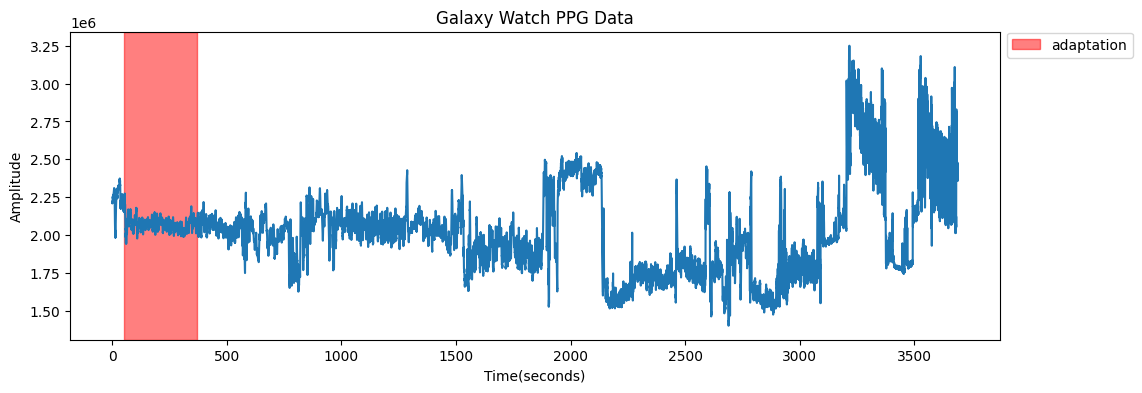

In [387]:
plot_data_event(polarh10_df, polarh10_sample_rate, event_dict, 1)
plot_data_event(e4_df, e4_sample_rate, event_dict, 1)
plot_data_event(galaxy_df, galaxy_sample_rate, event_dict, 1)

### Plot with Event Marker - by Event Name

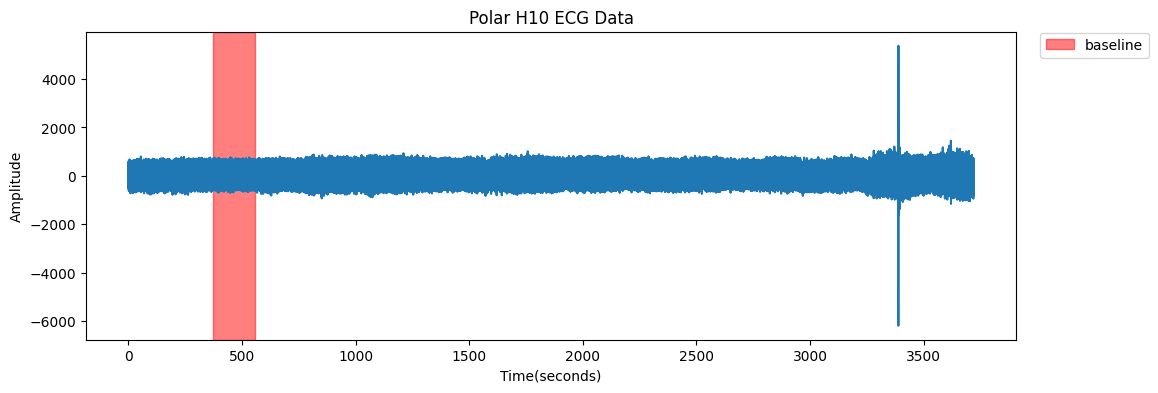

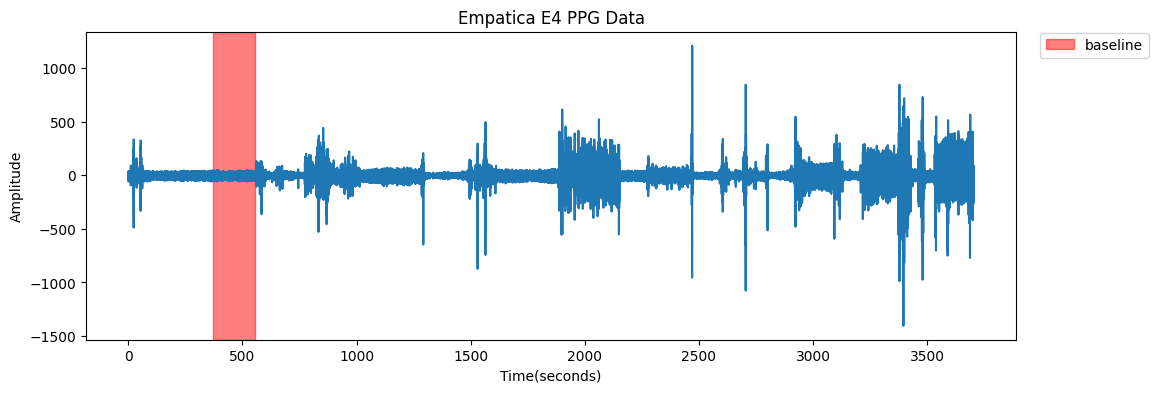

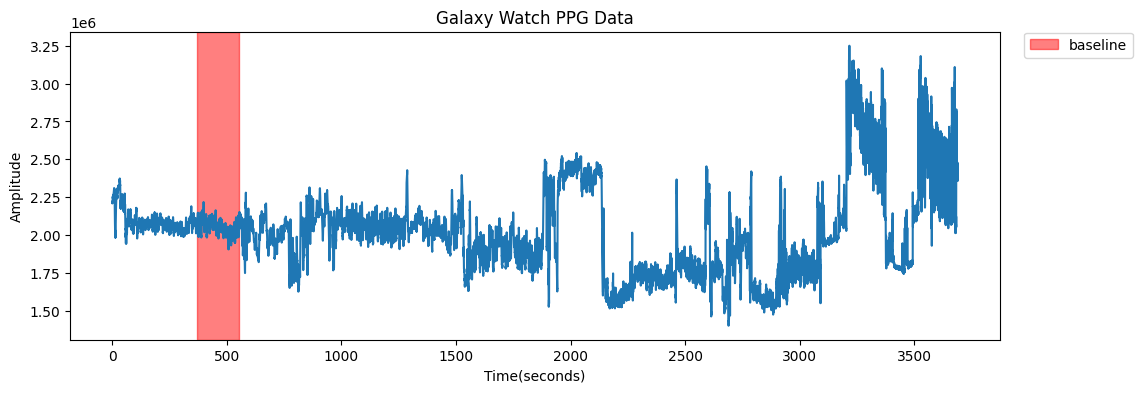

In [389]:
plot_data_event(polarh10_df, polarh10_sample_rate, event_dict, "baseline")
plot_data_event(e4_df, e4_sample_rate, event_dict, "baseline")
plot_data_event(galaxy_df, galaxy_sample_rate, event_dict, "baseline")

### Plot with Event Marker - Every Event

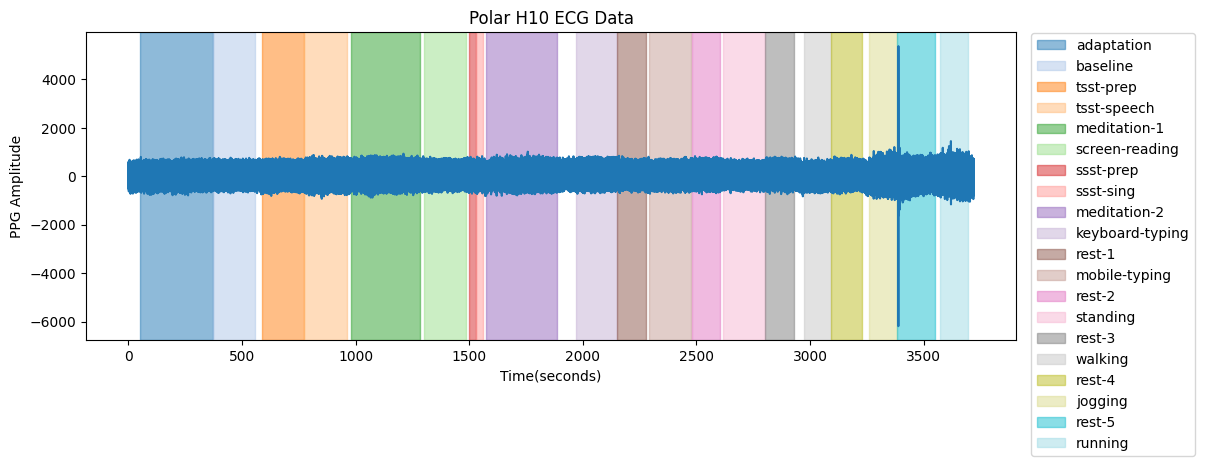

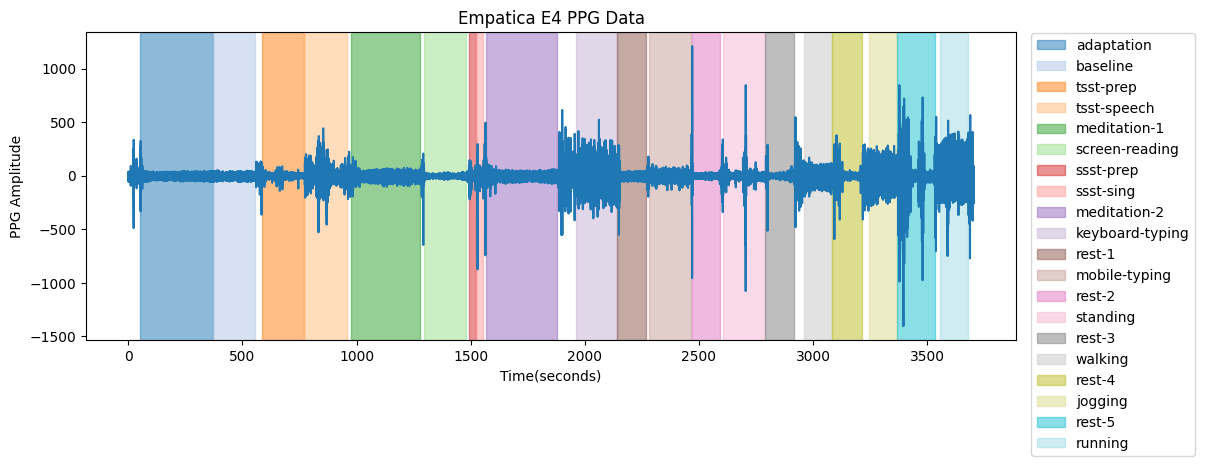

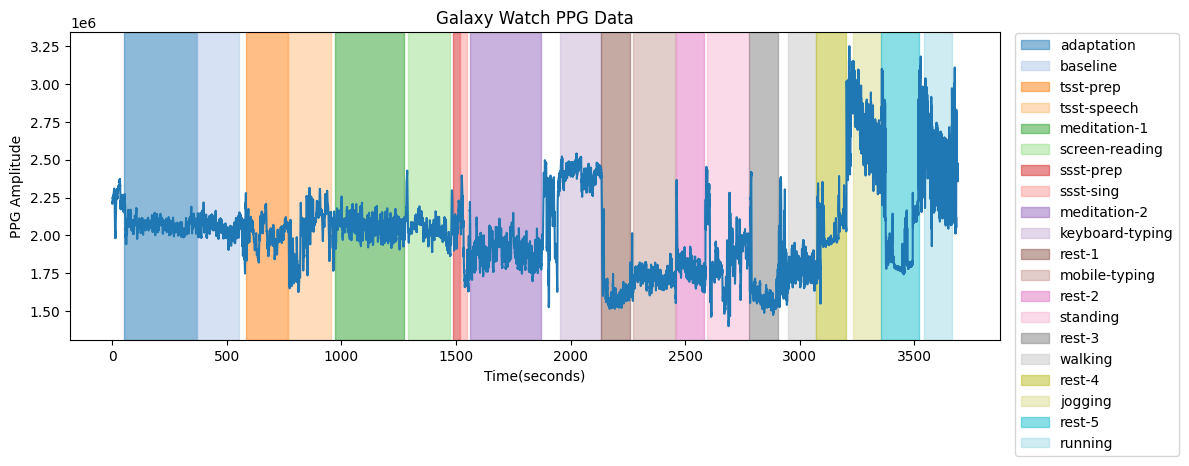

In [390]:
plot_data_whole_event(polarh10_df, polarh10_sample_rate, event_dict)
plot_data_whole_event(e4_df, e4_sample_rate, event_dict)
plot_data_whole_event(galaxy_df, galaxy_sample_rate, event_dict)